In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

In [ ]:
!git clone https://github.com/burchim/NeuralNetsWithNumpy.git
%cd NeuralNetsWithNumpy

In [2]:
# Modules
from nnet.modules import (
  Identity,
  Sigmoid,
  Tanh,
  ReLU,
  PReLU,
  Swish,
  LayerNorm,
  BatchNorm
)

# Optimizers
from nnet.optimizers import (
  SGD,
  RMSprop,
  Adam,
  AdamW
)

# Losses
from nnet.losses import (
  MeanAbsoluteError,
  MeanSquaredError,
  SoftmaxCrossEntropy
)

# Schedulers
from nnet.schedulers import (
  ConstantScheduler,
  WarmupExpDecayScheduler
)

# Model
from nnet.models import MLPModel

In [3]:
# Seed
seed = 42
np.random.seed(seed)

# dtype
dtype = np.float64

# Load Dataset
(x_train, y_train), (x_val, y_val) = mnist.load_data()

# Prepare Dataset
x_train = (x_train/255).astype(dtype)
y_train = to_categorical(y_train).astype(dtype)
x_val = (x_val/255).astype(dtype)
y_val = to_categorical(y_val).astype(dtype)

# shapes
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_val:  '  + str(x_val.shape))
print('y_val:  '  + str(y_val.shape))
print()

x_train: (60000, 28, 28)
y_train: (60000, 10)
x_val:  (10000, 28, 28)
y_val:  (10000, 10)



In [4]:
# Params
epochs = 5
batch_size = 32
optimizer = AdamW
scheduler = WarmupExpDecayScheduler

in_height = 28
in_width = 28
in_dim = 1
out_dim = 10
dim_layers = [128, out_dim]
hidden_function = ReLU
norm = LayerNorm
drop_rate = 0
out_function = Identity
loss_function = SoftmaxCrossEntropy

In [5]:
# Create Model
model = MLPModel(
  in_height=in_height, 
  in_width=in_width, 
  in_dim=in_dim, 
  dim_layers=dim_layers,
  hidden_function=hidden_function,
  out_function=out_function,
  loss_function=loss_function,
  norm=norm,
  drop_rate=drop_rate,
  dtype=dtype
)

model.optimizer = optimizer(model.get_parameters(), lr=0, betas=(0.9, 0.999), eps=1e-8)
model.scheduler = scheduler(model.optimizer, warmup_steps=len(x_train) // batch_size, lr_max=0.01, alpha=0.1, end_step=4*len(x_train) // batch_size)

# Model Summary
model.summary()

102026 parameters
mlp.0.Linear.weight                      shape (784, 128)       mean -0.0001      std 0.0357       dtype float64     
mlp.0.Linear.bias                        shape (128,)           mean 0.0000       std 0.0000       dtype float64     
mlp.0.LayerNorm.gamma                    shape (128,)           mean 1.0000       std 0.0000       dtype float64     
mlp.0.LayerNorm.beta                     shape (128,)           mean 0.0000       std 0.0000       dtype float64     
mlp.1.Linear.weight                      shape (128, 10)        mean 0.0011       std 0.0883       dtype float64     
mlp.1.Linear.bias                        shape (10,)            mean 0.0000       std 0.0000       dtype float64     


In [6]:
# Batch Training set
train_len = len(x_train)
overflow = train_len % batch_size
x_train = x_train[:train_len-overflow]
y_train = y_train[:train_len-overflow]
x_train = np.reshape(x_train, (-1, batch_size, in_height, in_width))
y_train = np.reshape(y_train, (-1, batch_size, out_dim))

print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))

# Batch validation set
val_len = len(x_val)
overflow = val_len % batch_size
x_val = x_val[:val_len-overflow]
y_val = y_val[:val_len-overflow]
x_val = np.reshape(x_val, (-1, batch_size, in_height, in_width))
y_val = np.reshape(y_val, (-1, batch_size, out_dim))

print('x_val: ' + str(x_val.shape))
print('y_val: ' + str(y_val.shape))

x_train: (1875, 32, 28, 28)
y_train: (1875, 32, 10)
x_val: (312, 32, 28, 28)
y_val: (312, 32, 10)


In [7]:
# Train Model
model.fit(
  dataset_train=(x_train, y_train),
  epochs=epochs,
  dataset_val=(x_val, y_val)
)

Epoch 1/5:


mean loss: 0.3082 - batch loss: 0.0743 - mean acc: 90.70 - batch acc: 100.00 - lr: 0.010000 - step: 1875: 100%|█████████| 1875/1875 [00:21<00:00, 87.03it/s]
mean loss: 0.1641 - batch loss: 0.1875 - mean acc: 94.86 - batch acc: 93.75: 100%|███████████████████████████████████████| 312/312 [00:01<00:00, 287.90it/s]


validation loss: 0.1641
validation accuracy: 94.86%

Epoch 2/5:


mean loss: 0.1095 - batch loss: 0.0560 - mean acc: 96.58 - batch acc: 96.88 - lr: 0.004642 - step: 3750: 100%|██████████| 1875/1875 [00:27<00:00, 68.02it/s]
mean loss: 0.0851 - batch loss: 0.0777 - mean acc: 97.42 - batch acc: 93.75: 100%|███████████████████████████████████████| 312/312 [00:01<00:00, 164.18it/s]


validation loss: 0.0851
validation accuracy: 97.42%

Epoch 3/5:


mean loss: 0.0614 - batch loss: 0.0182 - mean acc: 98.09 - batch acc: 100.00 - lr: 0.002154 - step: 5625: 100%|█████████| 1875/1875 [00:30<00:00, 61.10it/s]
mean loss: 0.0750 - batch loss: 0.0209 - mean acc: 97.66 - batch acc: 100.00: 100%|██████████████████████████████████████| 312/312 [00:02<00:00, 125.73it/s]


validation loss: 0.0750
validation accuracy: 97.66%

Epoch 4/5:


mean loss: 0.0358 - batch loss: 0.0861 - mean acc: 98.89 - batch acc: 96.88 - lr: 0.001000 - step: 7500: 100%|█████████| 1875/1875 [00:17<00:00, 106.95it/s]
mean loss: 0.0612 - batch loss: 0.0192 - mean acc: 97.99 - batch acc: 100.00: 100%|██████████████████████████████████████| 312/312 [00:01<00:00, 302.25it/s]


validation loss: 0.0612
validation accuracy: 97.99%

Epoch 5/5:


mean loss: 0.0219 - batch loss: 0.0032 - mean acc: 99.41 - batch acc: 100.00 - lr: 0.000464 - step: 9375: 100%|████████| 1875/1875 [00:14<00:00, 131.51it/s]
mean loss: 0.0557 - batch loss: 0.0118 - mean acc: 98.30 - batch acc: 100.00: 100%|██████████████████████████████████████| 312/312 [00:01<00:00, 299.37it/s]

validation loss: 0.0557
validation accuracy: 98.30%



pred 4
truth 4


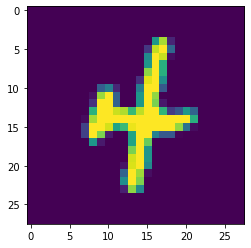

pred 6
truth 6


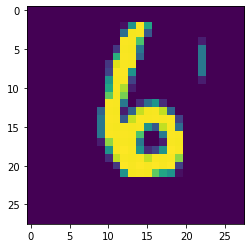

pred 1
truth 1


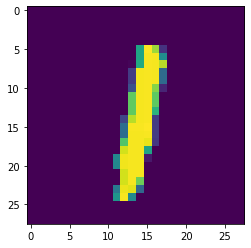

pred 2
truth 2


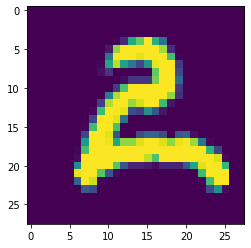

pred 5
truth 5


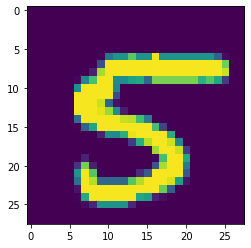

pred 0
truth 0


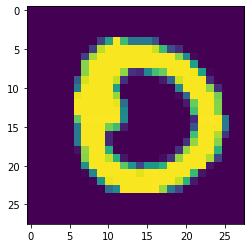

pred 7
truth 7


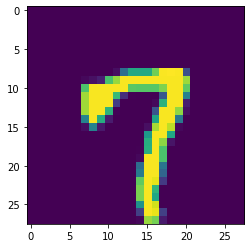

pred 9
truth 9


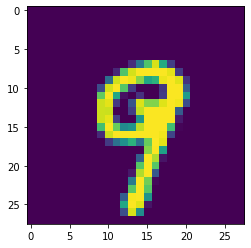

pred 9
truth 9


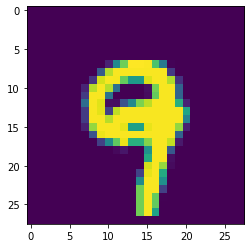

pred 0
truth 0


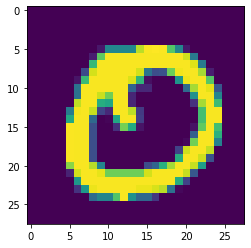

pred 3
truth 3


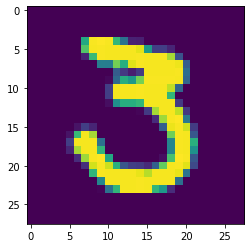

pred 8
truth 8


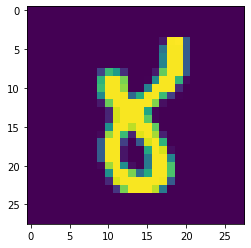

pred 2
truth 4


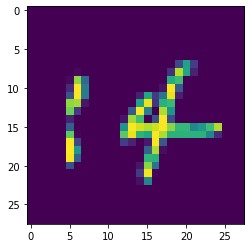

pred 4
truth 4


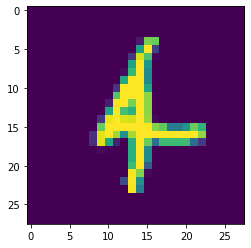

pred 8
truth 8


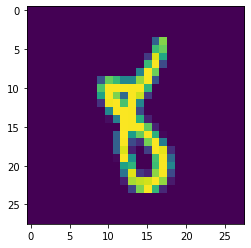

pred 1
truth 1


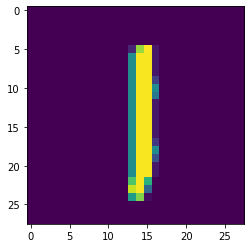

pred 8
truth 8


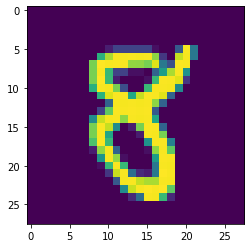

pred 6
truth 6


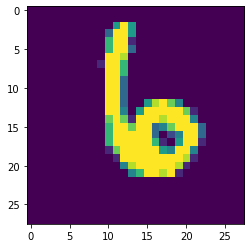

pred 5
truth 5


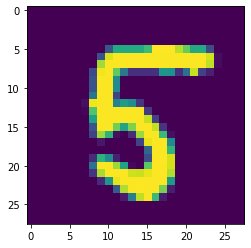

pred 9
truth 9


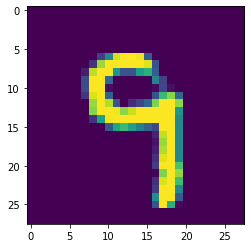

pred 0
truth 0


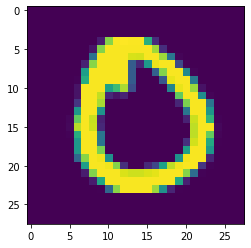

pred 0
truth 0


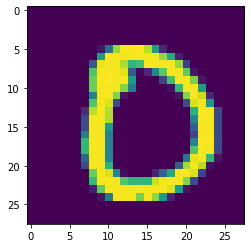

pred 0
truth 0


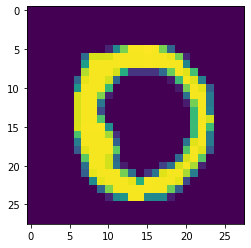

pred 3
truth 3


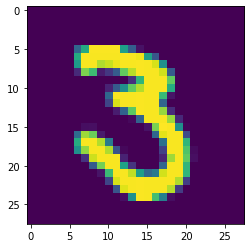

pred 7
truth 7


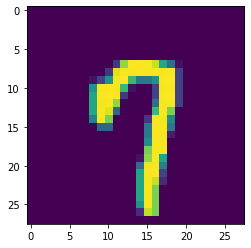

pred 1
truth 1


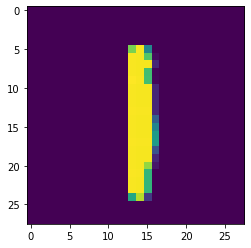

pred 6
truth 6


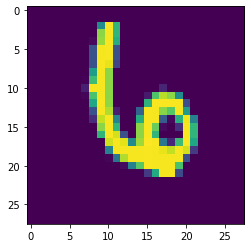

pred 4
truth 4


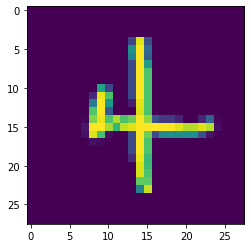

pred 2
truth 2


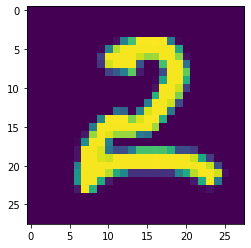

pred 6
truth 6


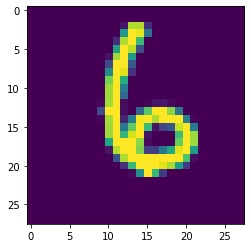

pred 6
truth 6


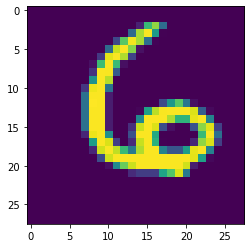

pred 0
truth 0


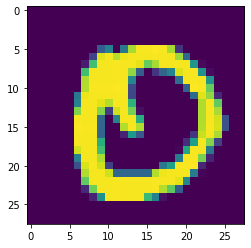

In [8]:
N = 1
indices = np.random.randint(0, len(x_val), size=N)

for n in range(N):
    x, y = x_val[indices[n]], y_val[indices[n]]
    y_pred = model(x)

    for b in range(batch_size):

        print("pred", y_pred[b].argmax(axis=-1))
        print("truth", y[b].argmax(axis=-1))
        plt.imshow(x[b])
        plt.show()